# Lecture 4.2 | Data Cleaning
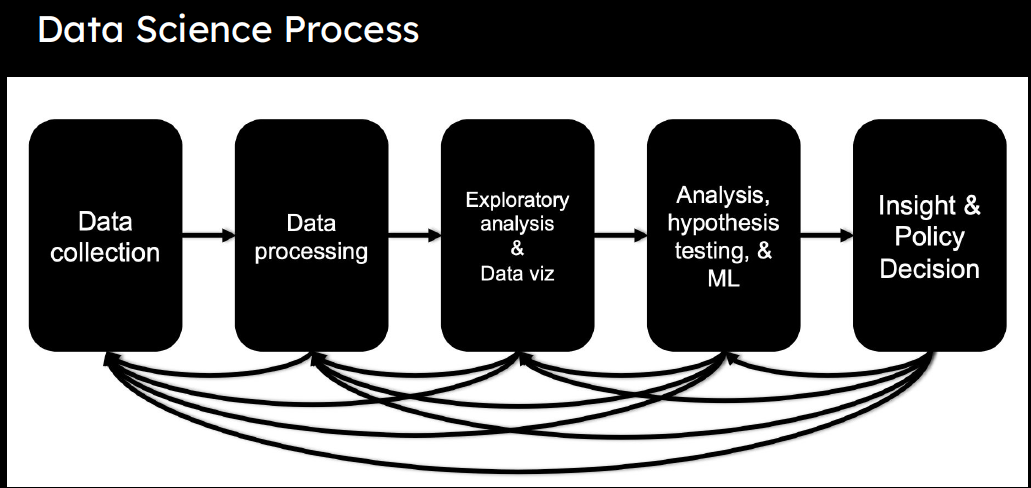
src = https://www.kaggle.com/datasets/snehangsude/audible-dataset

In [1]:
import pandas as pd

In [2]:
audible_df = pd.read_csv('/Users/christopherreid/My Drive (christopherreid@arizona.edu)/Classes/6. Summer 2023/CSC 380 - Principles of Data Science/Lectures/Jupyter Notebooks/audible_uncleaned.csv')
audible_df.sample(2)

,name,author,narrator,time,releasedate,language,stars,price
24241,My Life Without God,Writtenby:WilliamJ.Murray,Narratedby:AlKessel,10 hrs and 25 mins,25-07-17,English,Not rated yet,820.00
75027,Better with You,Writtenby:GiannaGabriela,"Narratedby:StephanieRose,BrandonUtah",6 hrs and 29 mins,18-09-19,English,Not rated yet,586.00


## Describe() method

**The describe() method returns description of the data in the DataFrame.**

**If the DataFrame contains numerical data, the description contains these information for each column:**

**count - The number of not-empty values.**

**mean - The average (mean) value.**

**std - The standard deviation.**

**min - the minimum value.**

**25% - The 25% percentile.**

**50% - The 50% percentile.**

**75% - The 75% percentile.**

**max - the maximum value.**

In [3]:
audible_df.describe()

,name,author,narrator,time,releasedate,language,stars,price
count,87489,87489,87489,87489,87489,87489,87489,87489
unique,82767,48374,29717,2284,5058,36,665,1011
top,The Art of War,"Writtenby:矢島雅弘,石橋遊",Narratedby:anonymous,2 mins,16-05-18,English,Not rated yet,586.00
freq,20,874,1034,372,773,61884,72417,5533


## Info() method

**The info() method prints information about the DataFrame.
The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).**

In [4]:
audible_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


**Name**

In [5]:
audible_df['name'].sample(3).to_frame()

,name
4635,El reto de Floki
3402,Like Kobe
75197,Fae's Claim Boxset


**Author**

In [6]:
audible_df['author'].sample(3).to_frame()

,author
61823,Writtenby:Dr.DeborahMacNamara
86979,Writtenby:iMinds
65623,Writtenby:GauthamaBuda


In [7]:
sample = audible_df['author'][0]
sample

'Writtenby:GeronimoStilton'

In [8]:
# To remove: 'Writtenby:...'
# Option 1: Split on a specific character

sample.split(':')[1]

'GeronimoStilton'

In [9]:
# To remove: 'Writtenby:...'
# Option 2: Replace with empty string

sample.replace('Writtenby:','')

'GeronimoStilton'

## 1. Regex

**Like 'find', but better.**

**A Regular Expressions (RegEx) is a special sequence of chars that uses a search pattern to find a string or set of strings. It can detect the presence or absense of a text by matching it with a particular pattern, and also can split a pattern into one or more sub-patterns.**

cheatsheat link = https://cheatography.com/mutanclan/cheat-sheets/python-regular-expression-regex/

In [10]:
# Find all emails (.com, .edu, .net)
import re

In [11]:
email_regex = "[a-zA-Z0-9]+@[a-zA-Z]+\.(com|net|edu)"

In [12]:
email_input = input()
if re.search(email_regex, email_input):
    print('Valid Email')
else:
    print('Invalid Email')

c@blank.com
Valid Email


In [13]:
# Find capital letter in name, insert a '_' space character there.

uppercase_letter_pattern = '.[^A-Z]*'
re.findall(uppercase_letter_pattern, sample.replace('Writtenby:',''))

['Geronimo', 'Stilton']

In [14]:
modified_sample = sample.replace('Writtenby:','')
names = modified_sample.split(',')
[' '.join(re.findall(uppercase_letter_pattern, name)) for name in names]

['Geronimo Stilton']

## apply() method

**.apply(func, axis, raw, result_type, args, kwds)**

**The apply() method allows you to apply a function along one of the axis of the DataFrame, default 0, which is the index (row) axis.**

In [15]:
def format_names(input_string):
    cleaned_string = input_string.replace('Writtenby:','').replace('Narratedby:','')
    formatted_names = []
    names = cleaned_string.split(',')
    for name in names:
        formatted_names.append(' '.join(re.findall(uppercase_letter_pattern, name)))
    return formatted_names

In [16]:
audible_df['author'] = audible_df['author'].apply(lambda input_string : format_names(input_string))
audible_df

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,[Geronimo Stilton],Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,[Rick Riordan],Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,[Jeff Kinney],Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,[Rick Riordan],Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",[Rick Riordan],Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,[Chris Stewart],Narratedby:ChrisStewart,7 hrs and 34 mins,09-03-17,English,Not rated yet,596.00
87485,The Alps,[Stephen O' Shea],Narratedby:RobertFass,10 hrs and 7 mins,21-02-17,English,Not rated yet,820.00
87486,The Innocents Abroad,[Mark Twain],Narratedby:FloGibson,19 hrs and 4 mins,30-12-16,English,Not rated yet,938.00
87487,A Sentimental Journey,[Laurence Sterne],Narratedby:AntonLesser,4 hrs and 8 mins,23-02-11,English,Not rated yet,680.00


**Narrator**

In [17]:
audible_df['narrator'] = audible_df['narrator'].apply(lambda input_string : format_names(input_string))
audible_df.sample(2)

,name,author,narrator,time,releasedate,language,stars,price
48198,Mahabharata Vol 4,[Bibek Debroy],[Abhishek Sharma],27 hrs and 29 mins,30-11-21,English,Not rated yet,879.00
39780,The Path to Blitzkrieg,[Robert M. Citino],[Mark Ashby],10 hrs and 23 mins,13-02-18,English,5 out of 5 stars1 rating,836.00


**Time**

In [18]:
audible_df['time'].to_list()[:5]

['2 hrs and 20 mins',
 '13 hrs and 8 mins',
 '2 hrs and 3 mins',
 '11 hrs and 16 mins',
 '10 hrs']

In [19]:
time_str = audible_df['time'].to_list()[0]
time_str

'2 hrs and 20 mins'

In [20]:
formatted_time_str = time_str.replace(' hrs and', 'h').replace(' hrs', 'h').replace(' hr','h').replace(' mins','m').replace(' min','m')
formatted_time_str

'2h 20m'

In [21]:
def convert_strtime_minutes(time_str):
    if (time_str == 'Less than 1 minute'):
        return 0
    time_str = time_str.replace(' hrs and', 'h').replace(' hrs', 'h').replace(' hr','h').replace(' mins','m').replace(' min','m')
    h,m = 0,0
    for time_item in formatted_time_str.split(' '):
        if 'h' in time_item:
            h = int(time_item.replace('h', ''))
        if 'm' in time_item:
            m = int(time_item.replace('m', ''))
    return (h*60)+m

In [22]:
audible_df['time'] = audible_df['time'].apply(lambda time_str : convert_strtime_minutes(time_str))
audible_df.sample(3)

,name,author,narrator,time,releasedate,language,stars,price
24844,Min historie,[Pelé],[Bjarne Mouridsen],140,26-10-21,danish,Not rated yet,267.00
15370,The Phoenix Years,[Madeleine O' Dea],[Caroline Mc Laughlin],140,03-10-17,English,Not rated yet,836.00
26855,Three Ordinary Girls,[Tim Brady],[Davidde Vries],140,23-02-21,English,Not rated yet,586.00


In [23]:
audible_df.rename({'time':'time in minutes'}, axis=1 ,inplace=True)
audible_df

,name,author,narrator,time in minutes,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,[Geronimo Stilton],[Bill Lobely],140,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,[Rick Riordan],[Robbie Daymond],140,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,[Jeff Kinney],[Dan Russell],140,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,[Rick Riordan],[Soneela Nankani],140,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",[Rick Riordan],[Jesse Bernstein],140,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,[Chris Stewart],[Chris Stewart],140,09-03-17,English,Not rated yet,596.00
87485,The Alps,[Stephen O' Shea],[Robert Fass],140,21-02-17,English,Not rated yet,820.00
87486,The Innocents Abroad,[Mark Twain],[Flo Gibson],140,30-12-16,English,Not rated yet,938.00
87487,A Sentimental Journey,[Laurence Sterne],[Anton Lesser],140,23-02-11,English,Not rated yet,680.00


**Release Date**

**Standardizing the format**

In [24]:
audible_df['releasedate'] = pd.to_datetime(audible_df['releasedate'])
audible_df.sample(2)

/var/folders/2n/5z7cbr893s18z6swkryrr7m40000gn/T/ipykernel_15852/2161577675.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  audible_df['releasedate'] = pd.to_datetime(audible_df['releasedate'])


,name,author,narrator,time in minutes,releasedate,language,stars,price
76071,Autumn Passion Love (Spanish edition),[Lorraine Cocó],[Eva Bau],140,2021-08-11,spanish,Not rated yet,133.00
43466,The Affair of the Porcelain Dog,[Jess Faraday],[Philip Battley],140,2012-11-16,English,Not rated yet,601.00


**Language**

**Making sure all language strings are uniformly lowercase**

In [25]:
audible_df['language'].value_counts().sort_values()

language
ukrainian               1
hebrew                  2
lithuanian              2
telugu                  2
basque                  2
slovene                 4
korean                  4
bulgarian               9
galician               10
arabic                 16
norwegian              16
greek                  18
turkish                20
czech                  23
afrikaans              28
urdu                   34
hungarian              36
romanian               50
icelandic              52
mandarin_chinese       97
catalan               153
tamil                 161
dutch                 190
finnish               197
polish                224
Hindi                 436
swedish               515
portuguese            526
danish                935
russian              1804
french               2386
italian              2694
japanese             3167
spanish              3496
german               8295
English             61884
Name: count, dtype: int64

In [26]:
audible_df['language'] = audible_df['language'].apply(str.lower)

In [27]:
audible_df.sample(3)

,name,author,narrator,time in minutes,releasedate,language,stars,price
22484,Scalia's Court,"[Antonin Scalia, Kevin A. Ring]",[David Drummond],140,2016-04-22,english,Not rated yet,"1,289.00"
13725,Cash Poor or College?,[Diane Warmsley],[Raymond Warmsley],140,2015-01-16,english,Not rated yet,468.00
29930,Guías HBR: Controla el estrés en el trabajo (N...,"[Núria Molines Galarza-translator, Harvard Bus...",[Antonio Alfonso Hernández Mateo],140,2021-08-11,spanish,Not rated yet,501.00


In [28]:
rating_str = audible_df['stars'].to_list()[0]
rating_str

'5 out of 5 stars34 ratings'

In [29]:
import numpy as np

def format_rating_text(rating_str):

    if rating_str == 'Not rated yet':
        return [np.NaN,np.NaN,0]
    else:
        split_text = rating_str.split(' stars')
    
        # Working on the stars and out of part
        stars_and_out_of = split_text[0].split(' out of')

        stars = float(stars_and_out_of[0])
        out_of = int(stars_and_out_of[1])

        # Working on number of ratings
        nos_of_rating = int(split_text[1].replace(' ratings','').replace(' rating','').replace(',',''))
        return stars, out_of, nos_of_rating

In [30]:
audible_df['stars'].apply(format_rating_text).to_list()

[(5.0, 5, 34),
 (4.5, 5, 41),
 (4.5, 5, 38),
 (4.5, 5, 12),
 (4.5, 5, 181),
 (5.0, 5, 72),
 (5.0, 5, 11),
 (5.0, 5, 50),
 (5.0, 5, 5),
 (5.0, 5, 58),
 (4.5, 5, 130),
 (5.0, 5, 6),
 (5.0, 5, 7),
 (5.0, 5, 41),
 (4.0, 5, 2),
 (4.5, 5, 33),
 (5.0, 5, 7),
 (5.0, 5, 20),
 (5.0, 5, 11),
 (5.0, 5, 13),
 (5.0, 5, 79),
 (4.5, 5, 47),
 (5.0, 5, 27),
 (4.5, 5, 25),
 (5.0, 5, 101),
 (5.0, 5, 15),
 (5.0, 5, 3),
 (5.0, 5, 18),
 (4.5, 5, 37),
 (5.0, 5, 9),
 (5.0, 5, 8),
 (5.0, 5, 5),
 (5.0, 5, 8),
 (5.0, 5, 8),
 [nan, nan, 0],
 (4.5, 5, 10),
 (4.0, 5, 28),
 (5.0, 5, 9),
 (5.0, 5, 18),
 (5.0, 5, 7),
 (5.0, 5, 19),
 (4.5, 5, 25),
 (5.0, 5, 11),
 (4.0, 5, 16),
 (5.0, 5, 12),
 (4.5, 5, 16),
 (4.0, 5, 4),
 (5.0, 5, 10),
 (5.0, 5, 7),
 (5.0, 5, 17),
 [nan, nan, 0],
 [nan, nan, 0],
 (5.0, 5, 9),
 (4.5, 5, 4),
 (5.0, 5, 8),
 (5.0, 5, 1),
 (5.0, 5, 14),
 (5.0, 5, 5),
 (5.0, 5, 1),
 (5.0, 5, 5),
 (5.0, 5, 6),
 [nan, nan, 0],
 [nan, nan, 0],
 [nan, nan, 0],
 (5.0, 5, 11),
 (5.0, 5, 9),
 (5.0, 5, 4),
 (5.0, 5, 8

In [31]:
star_rating_df = pd.DataFrame(audible_df['stars'].apply(format_rating_text).to_list(),columns=['star rating', 'total stars', 'number of ratings'])
star_rating_df.sample(100)

,star rating,total stars,number of ratings
57329,NaN,NaN,0
60487,NaN,NaN,0
10673,NaN,NaN,0
61895,5.0,5.0,2
31698,NaN,NaN,0
...,...,...,...
41925,NaN,NaN,0
21703,NaN,NaN,0
30326,NaN,NaN,0
23693,NaN,NaN,0


In [32]:
audible_df[['star rating', 'total stars', 'number of ratings']] = star_rating_df
audible_df.sample(3)

,name,author,narrator,time in minutes,releasedate,language,stars,price,star rating,total stars,number of ratings
15819,第78回 新刊ラジオ第2部プレミアム,"[矢島雅弘, 石橋遊]","[矢島雅弘, 石橋遊]",140,2018-05-16,japanese,Not rated yet,139.00,NaN,NaN,0
642,Wilma Walnuss und das kleine Baumhotel,[Katharina E. Volk],[Cathlen Gawlich],140,2021-03-09,german,Not rated yet,233.00,NaN,NaN,0
6718,Simon et le grand marathon des rennes de Noël,[Sophie De Mullenheim],[Will Production],140,2021-10-12,french,Not rated yet,74.00,NaN,NaN,0


In [33]:
del audible_df['stars']
audible_df.sample(3)

,name,author,narrator,time in minutes,releasedate,language,price,star rating,total stars,number of ratings
84296,Jillian Cade,[Jen Klein],[Ali Ahn],140,2015-01-09,english,703.00,NaN,NaN,0
64720,The Eighty-Twenty Rules,[William Thomas Novak],[Alan H. Sklar],140,2009-12-27,english,134.00,NaN,NaN,0
54052,Zonal,[Don Paterson],[Don Paterson],140,2020-03-26,english,569.00,NaN,NaN,0


**Price**

In [34]:
def format_pricing(price_text):
    if price_text == 'Free':
        return 0
    else:
        return float(price_text.replace(',',''))

In [35]:
audible_df['price  in indian rupees'] = audible_df['price'].apply(lambda price_text: format_pricing(price_text))

In [36]:
audible_df[audible_df['price'] == 'Free']

,name,author,narrator,time in minutes,releasedate,language,price,star rating,total stars,number of ratings,price in indian rupees
983,Ringo & the Yogi,[Prasun Roy],[Siddhanta Pinto],140,2019-11-19,english,Free,4.0,5.0,4,0.0
1414,The Velveteen Rabbit,[Margery Williams],[Richard Armitage],140,2020-08-14,english,Free,4.5,5.0,91,0.0
1513,Billi Aur Moosarani [Cat and Musrani],[Shivani],[Sarah Hashmi],140,2021-10-14,hindi,Free,NaN,NaN,0,0.0
2932,Pariyon Ki Kahaniya [Fairy Tales],[Jacob Grimm],[Anuradha Chauhan],140,2021-08-12,hindi,Free,NaN,NaN,0,0.0
4547,101 Best Indian Fables for Children,[Stuti Gupta],[Sunandha Raghunathan],140,2019-03-12,english,Free,4.0,5.0,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...
80021,FREE: The Undead,[R R Haywood],[Dan Morgan],140,2015-02-24,english,Free,4.0,5.0,8,0.0
81198,Supporters. Le Pilote,"[Pierre Niboyet, Audrey Poiret]",[Boris Rehlinger],140,2020-10-29,french,Free,NaN,NaN,0,0.0
82644,Boots Belts Berets,[Tanushree Podder],[Rannvijay Singh Singha],140,2019-08-27,english,Free,4.5,5.0,158,0.0
86771,Canada Is Awesome,[Neil Pasricha],[Neil Pasricha],140,2018-09-10,english,Free,4.5,5.0,29,0.0


In [37]:
audible_df.sample(100)

,name,author,narrator,time in minutes,releasedate,language,price,star rating,total stars,number of ratings,price in indian rupees
85556,"Ms. Marvel, Vol. 2: Generation Why","[G. Willow Wilson, Adrian Alphona, Marvel]","[Shanta Parasuraman, fullcast]",140,2019-01-10,english,703.00,5.0,5.0,1,703.0
74880,The Rulebreaker,[Claire Contreras],"[Trei Taylor, Henry Cevallos]",140,2022-01-18,english,"1,005.00",NaN,NaN,0,1005.0
35629,Puterea prezentului,[Eckhart Tolle],[BogdanȘerban],140,2021-11-06,romanian,267.00,NaN,NaN,0,267.0
41091,Origin Story,[David Christian],[Jamie Jackson],140,2018-05-22,english,938.00,4.5,5.0,24,938.0
70685,The Innkeeper's Bride,[Kathleen Fuller],[Christina Moore],140,2020-01-14,english,"1,172.00",NaN,NaN,0,1172.0
...,...,...,...,...,...,...,...,...,...,...,...
69307,The Kingdom of the Cults (Sixth Edition),[Walter Martin],[Kyle Tait],140,2021-12-01,english,"1,055.00",NaN,NaN,0,1055.0
76080,The Path to you (German edition),"[Claire Kingsley, Cécile Lecaux-Übersetzer]","[Leyla Trebbien, Kevin Kasper]",140,2021-10-29,german,334.00,NaN,NaN,0,334.0
84409,Crimson Frost,[Jennifer Estep],[Tara Sands],140,2012-12-24,english,"1,005.00",NaN,NaN,0,1005.0
61339,Mom Enough,"[Tony Reinke, Karalee Reinke]","[Charity Spencer, Preston Butler I I I]",140,2021-12-16,english,585.00,NaN,NaN,0,585.0


In [38]:
del audible_df['price']

In [40]:
audible_df.sample(15)

,name,author,narrator,time in minutes,releasedate,language,star rating,total stars,number of ratings,price in indian rupees
17854,H.N.I.C.,"[Albert"" Prodigy"" Johnson]","[Cary Hite, Kim Johnson]",140,2013-07-16,english,NaN,NaN,0,468.0
46426,The Next Best Thing,[Sandra Kitt],[Robin Eller],140,2014-07-11,english,NaN,NaN,0,668.0
72277,Mating Cinder,[Milly Taiden],[Cassandra Myles],140,2021-09-21,english,NaN,NaN,0,351.0
59087,Real Estate Success in 5 Minutes a Day,[Karen Briscoe],[Julie Reisler],140,2017-11-20,english,NaN,NaN,0,836.0
15317,The Face of Britain,[Simon Schama],"[Roy Mc Millan, Simon Schama]",140,2015-09-16,english,NaN,NaN,0,820.0
43486,Men of Smithfield: Adam and Holden,[L. B. Gregg],[Shannon Gunn],140,2012-11-26,english,NaN,NaN,0,601.0
62887,Taboo!,[Fouzia Saeed],[Ashlyn Kindberg],140,2014-06-24,english,4.0,5.0,1,820.0
52048,Demon's Mountain,[Margit Sandemo],[Nina Yndis],140,2022-11-03,english,NaN,NaN,0,535.0
80389,Polizón al cielo (Narración en Castellano) [St...,[J. S. Morin],[Pau Ferrer],140,2021-11-30,spanish,NaN,NaN,0,668.0
24625,90 Minutes in Heaven,"[Don Piper, Cecil Murphey]",[Don Piper],140,2015-09-25,english,NaN,NaN,0,586.0


In [41]:
audible_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   name                     87489 non-null  object        
 1   author                   87489 non-null  object        
 2   narrator                 87489 non-null  object        
 3   time in minutes          87489 non-null  int64         
 4   releasedate              87489 non-null  datetime64[ns]
 5   language                 87489 non-null  object        
 6   star rating              15072 non-null  float64       
 7   total stars              15072 non-null  float64       
 8   number of ratings        87489 non-null  int64         
 9   price  in indian rupees  87489 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 6.7+ MB


In [42]:
audible_df.describe()

,time in minutes,releasedate,star rating,total stars,number of ratings,price in indian rupees
count,87489.000000,87489,15072.00000,15072.0,87489.000000,87489.000000
mean,139.902388,2018-06-22 01:35:29.780886528,4.45694,5.0,3.723371,559.009246
min,0.000000,1998-12-27 00:00:00,1.00000,5.0,0.000000,0.000000
25%,140.000000,2016-08-30 00:00:00,4.00000,5.0,0.000000,268.000000
50%,140.000000,2020-01-30 00:00:00,4.50000,5.0,0.000000,585.000000
75%,140.000000,2021-08-04 00:00:00,5.00000,5.0,0.000000,755.000000
max,140.000000,2025-11-14 00:00:00,5.00000,5.0,12573.000000,7198.000000
std,3.695449,NaN,0.72394,0.0,86.499601,336.096642


In [44]:
original_audible_df = pd.read_csv('/Users/christopherreid/My Drive (christopherreid@arizona.edu)/Classes/6. Summer 2023/CSC 380 - Principles of Data Science/Lectures/Jupyter Notebooks/audible_uncleaned.csv')
original_audible_df.sample(2)

,name,author,narrator,time,releasedate,language,stars,price
19491,Une mère suivi de Trente tableaux [A Mother Fo...,Writtenby:PauleBaillargeon,Narratedby:PauleBaillargeon,2 hrs and 53 mins,27-09-21,french,Not rated yet,527.00
161,Scary Stories for Young Foxes: The City,"Writtenby:ChristianMcKayHeidicker,JunyiWu-illu...",Narratedby:ChristianMcKayHeidicker,9 hrs and 13 mins,28-09-21,English,Not rated yet,703.00


In [45]:
audible_df.sample(2)

,name,author,narrator,time in minutes,releasedate,language,star rating,total stars,number of ratings,price in indian rupees
40969,Olympe de Gouges - La déclaration de la femme ...,[Cécile Berly],[Cécile Berly],140,2021-10-15,french,NaN,NaN,0,793.0
75697,The Winter Sea,[Susanna Kearsley],[Rosalyn Landor],140,2016-12-20,english,4.5,5.0,2,873.0


**What is the avg number of ratings a listing in audible_in recieves?**

In [47]:
#original_audible_df['']

## Multiple lines of code without cleaning

audible_df['number of ratings'].mean()

3.7233709380607847

## 2. Sound Data (Audio)

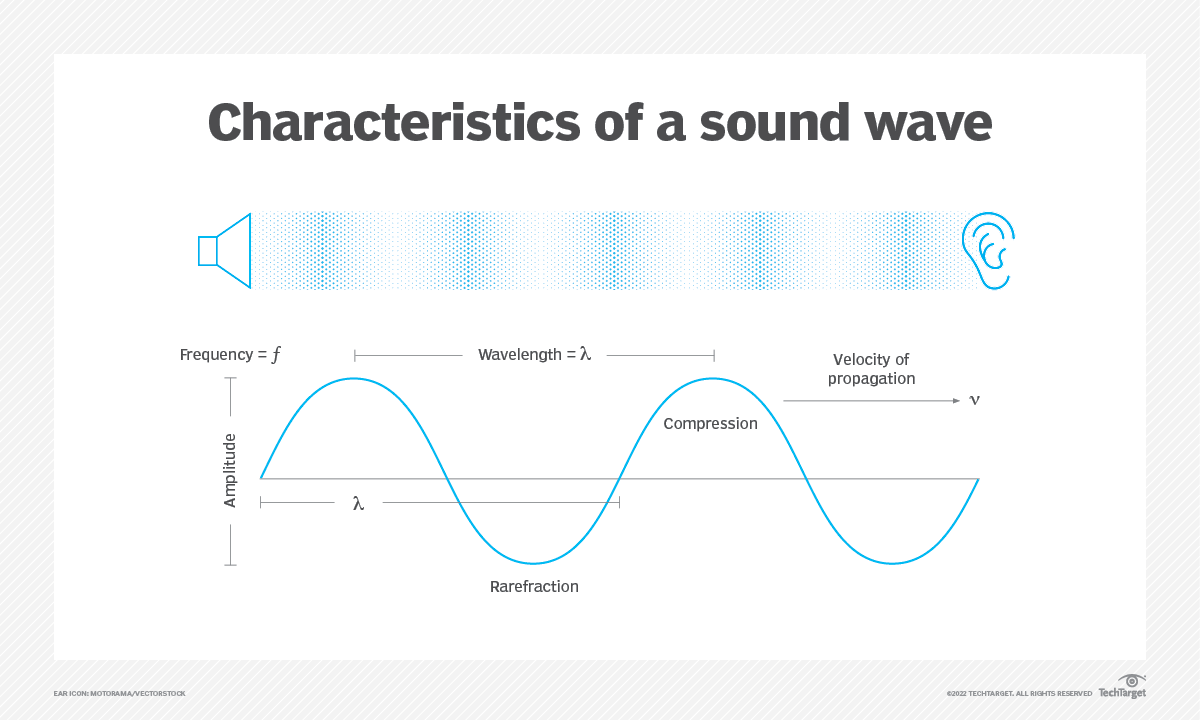



In [48]:
!pip install librosa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 5.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.0/377.0 kB 13.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.6/29.6 MB 14.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 13.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 24.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.1 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.3/381.3 kB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━

**Sound:** sequence of vibrations in varying pressure strengths (y)

**Sample Rate:** (sr) is the number of samples of audio carreidd per second, measured in Hz or KHz

In [59]:
# Importing 1 file

import librosa
audio_signal, sample_rate = librosa.load('/Users/christopherreid/My Drive (christopherreid@arizona.edu)/Classes/6. Summer 2023/CSC 380 - Principles of Data Science/Lectures/Jupyter Notebooks/mixkit-air-woosh-1489.wav', sr=2200)

print('signal:', audio_signal, '\n')
print('signal shape:', np.shape(audio_signal), '\n')
print('Sample Rate (KHz):', sample_rate, '\n')

# Verify length of audio
print('Check Len of Audio:',  np.shape(audio_signal)[0]/sample_rate)

signal: [ 3.4081393e-07  2.2799268e-06 -1.1799960e-06 ... -1.1393340e-07
 -3.4544118e-07  0.0000000e+00] 

signal shape: (5106,) 

Sample Rate (KHz): 2200 

Check Len of Audio: 2.320909090909091


**Trim Silence**

In [60]:
# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_signal_trimmed, _ = librosa.effects.trim(audio_signal)

# the result is a numpy ndarray
print('Audio File:', audio_signal_trimmed, '\n')
print('Audio File shape:', np.shape(audio_signal_trimmed))

Audio File: [ 3.4081393e-07  2.2799268e-06 -1.1799960e-06 ... -1.1393340e-07
 -3.4544118e-07  0.0000000e+00] 

Audio File shape: (5106,)


**Sound Waves - 2D Representation**

In [61]:
!pip install matplotlib
import matplotlib.pyplot as plt

Text(0.5, 0.98, 'Sound Waves')

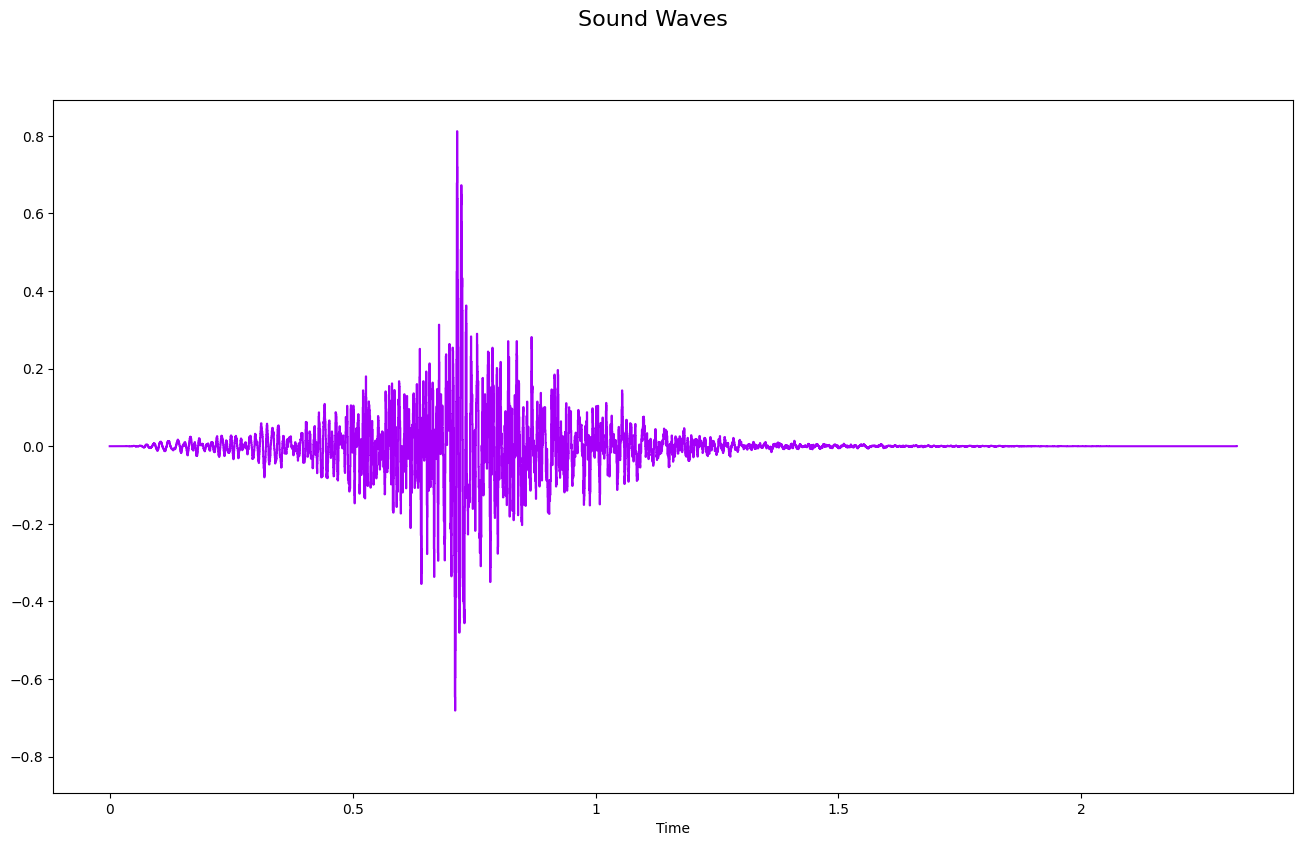

In [62]:
fig, ax = plt.subplots(figsize=(16,9))
librosa.display.waveshow(y = audio_signal, sr = sample_rate, color = '#A300F9')
fig.suptitle('Sound Waves', fontsize=16)

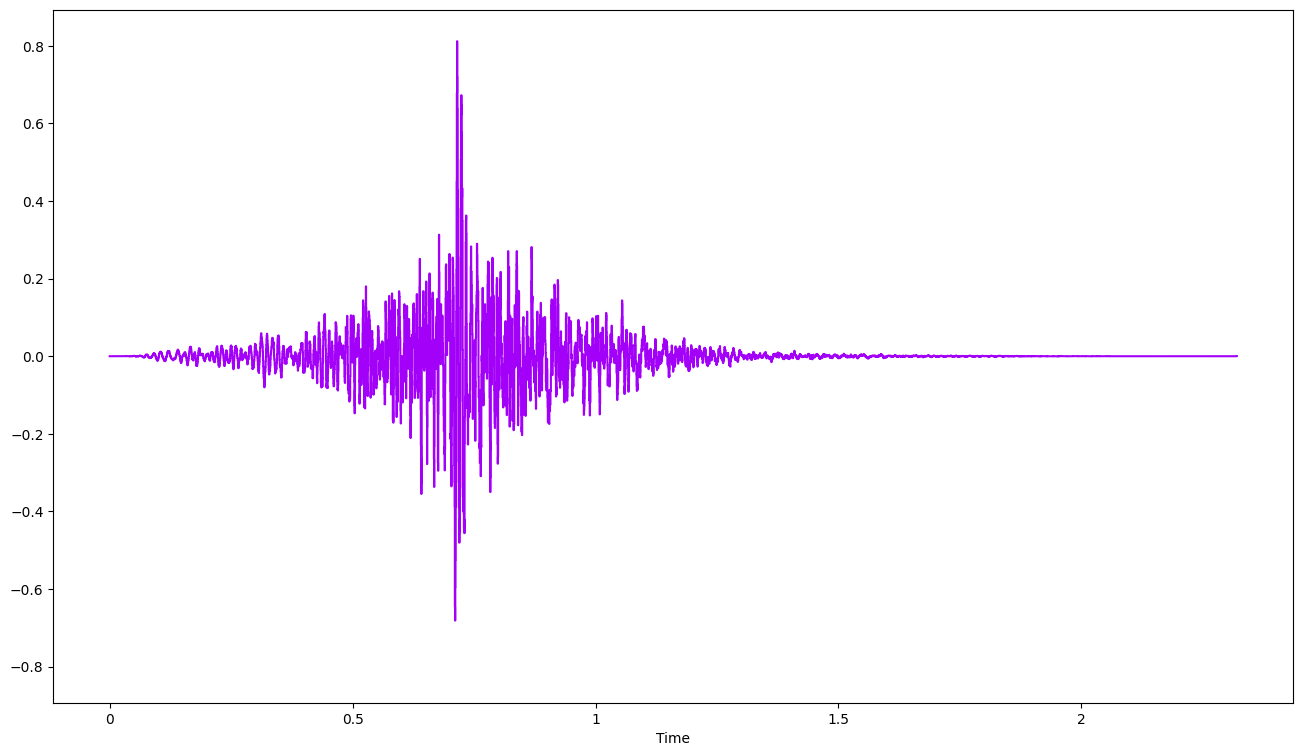

In [63]:
fig, ax = plt.subplots(figsize=(16,9))
librosa.display.waveshow(y = audio_signal_trimmed, sr = sample_rate, color = '#A300F9')

## Fourier Transform

Function that gets a signal in the time domain as input, and outputs its decomposition into frequencies. Transform both the y-axis (frequency) to log scale, and the 'color' axis (amplitude) to decibels, which is approx, the log scale of amplitudes.

In [64]:
# Default FFT Window size
n_fft = 2048 # FTT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
audio_fft = np.abs(librosa.stft(audio_signal_trimmed, n_fft= n_fft, hop_length=hop_length))

print('Shape of D object:', np.shape(audio_fft))

Shape of D object: (1025, 10)


## Spectrogram

A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time. When applied to an audio signal, spectrograms are sometimes called sonographs, voiceprints, or voicegrams (wiki).

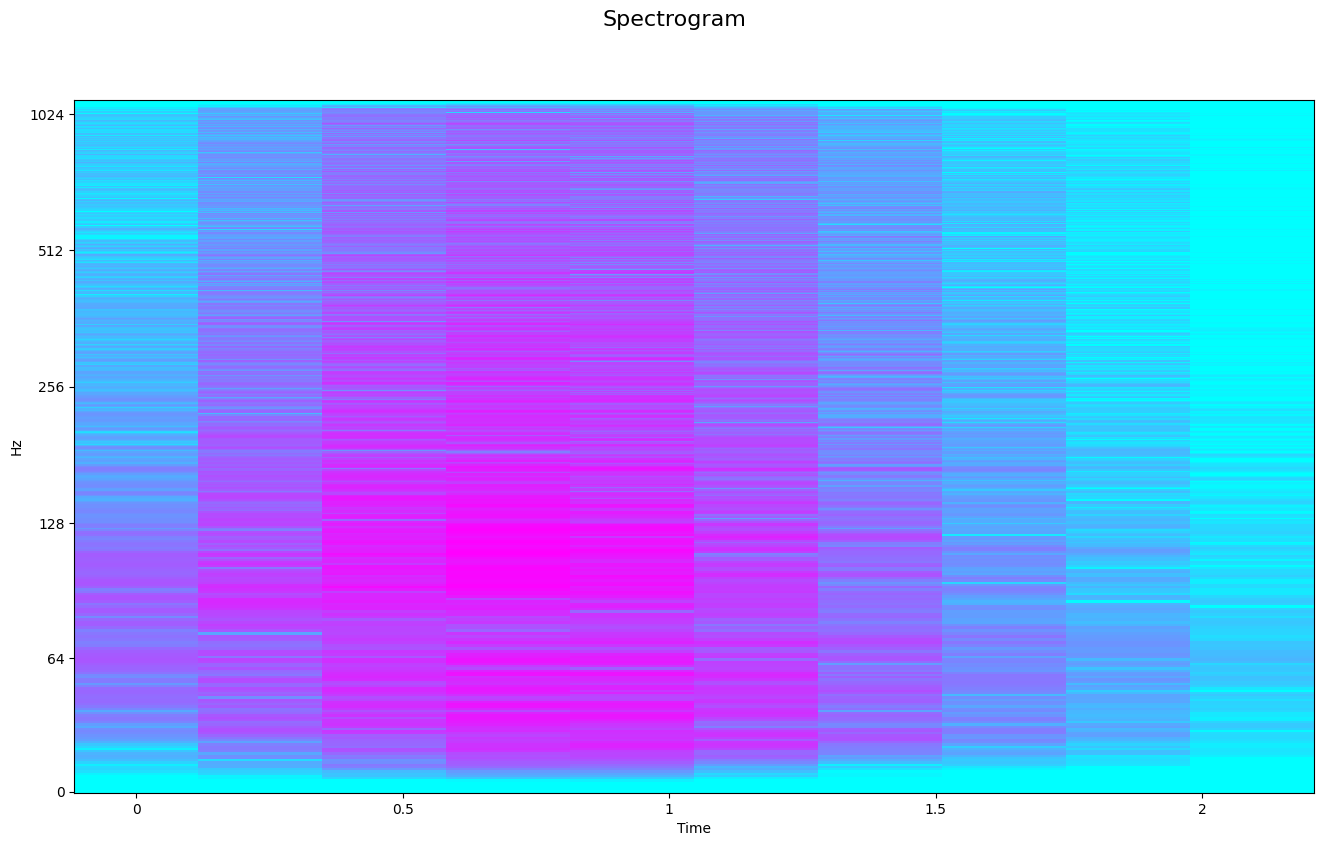

In [65]:
db_audio = librosa.amplitude_to_db(audio_fft, ref = np.max)

# == PLOT ==
fig, ax = plt.subplots(figsize = (16,9))
fig.suptitle('Spectrogram', fontsize = 16)

librosa.display.specshow(db_audio, sr = sample_rate, hop_length= hop_length, x_axis='time',y_axis='log',cmap = 'cool')

## 3. Image Data

In [67]:
# Computer Vision
!pip install opencv-python
import cv2
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 16.5 MB/s eta 0:00:0000:0100:01


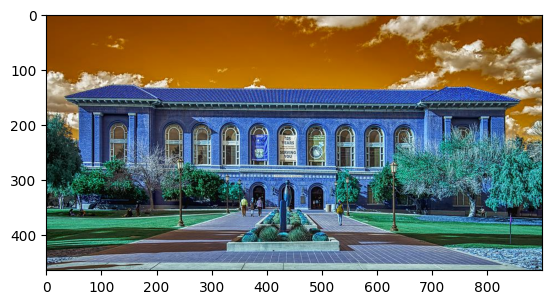

In [72]:
image_path ='/Users/christopherreid/My Drive (christopherreid@arizona.edu)/Classes/6. Summer 2023/CSC 380 - Principles of Data Science/Lectures/Jupyter Notebooks/AZ State Museum.jpg'
image = cv2.imread(image_path)

# Show image with matplot lib
plt.imshow(image)
plt.show()

### Colorsplaces

A colorspace is a specific organization of colors
- RGB(Red Green Blue)
- HSL (Hue Saturation Lightness)
- HSV (Hue Saturation Value)
- YUV (Luminance, blue-luminance, red-luminance)
- CMYK (Cyan, Magenta, Yellow, Key)

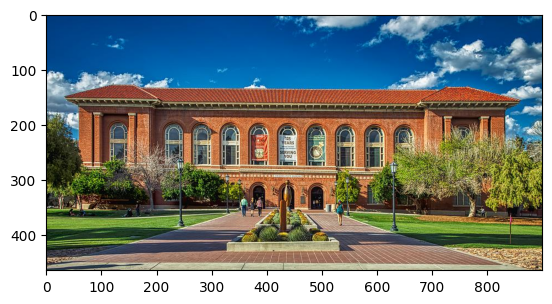

In [73]:
img_color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Show the image with matplot lib
plt.imshow(img_color)
plt.show()

### Convert to GreyScale

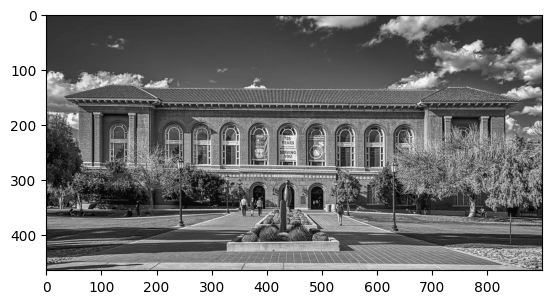

In [77]:
img_gray = cv2.cvtColor(img_color, cv2.COLOR_RGB2GRAY)

# SHow the timage with matplotlib
plt.imshow(img_gray, cmap='gray')
plt.show()

### Resizing

In [81]:
img_color.shape

(464, 900, 3)

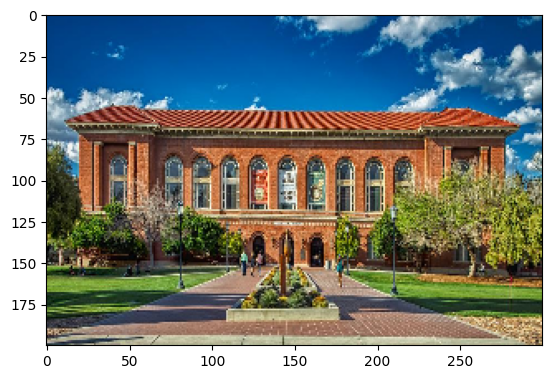

In [80]:
resized_pic = cv2.resize(img_color, (300,200))
plt.imshow(resized_pic, cmap='gray')
plt.show()

### Rotate

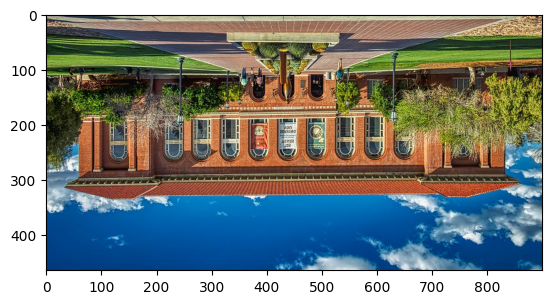

In [79]:
img_rotated = cv2.flip(img_color, 0)

plt.imshow(img_rotated)
plt.show()

### Crop

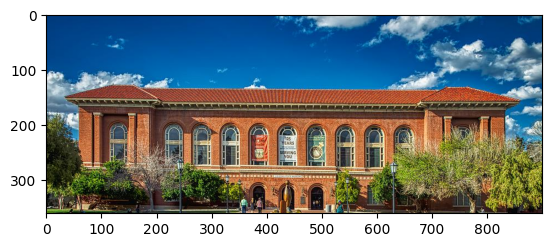

In [90]:
plt.imshow(img_color[110:360,0:900])